# PCA Analysis on Spot Yields

This notebook performs **Principal Component Analysis (PCA)** on spot yield data, 
applying the following steps:

1. Generate or load spot yield data.
2. Compute **12-month proportionate change** in yields.
3. Apply **log transformation** to stabilize variance.
4. Standardize the data for PCA.
5. Perform **PCA** to extract principal components.
6. Analyze eigenvectors and explained variance.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set seed for reproducibility
np.random.seed(42)


In [5]:
# Generate synthetic spot yield data (500 days, 5 maturities)
n_days = 500
maturities = ["1Y", "2Y", "5Y", "10Y", "30Y"]

# Simulate yield movements (base yield + random walk component)
base_yield_curve = np.array([2.0, 2.5, 3.0, 3.5, 4.0])  # Base rates for maturities
random_changes = np.cumsum(np.random.normal(scale=0.02, size=(n_days, len(maturities))), axis=0)
spot_yields = base_yield_curve + random_changes

# Convert to DataFrame
spot_yield_df = pd.DataFrame(spot_yields, columns=maturities)
spot_yield_df.head()


,1Y,2Y,5Y,10Y,30Y
0,2.009934,2.497235,3.012954,3.530461,3.995317
1,2.005252,2.528819,3.028302,3.521071,4.006168
2,1.995983,2.519504,3.033142,3.482806,3.971670
3,1.984737,2.499248,3.039427,3.464645,3.943424
4,2.014050,2.494732,3.040777,3.436150,3.932536


In [6]:
# Compute 12-month proportionate change in yield
prop_change = spot_yield_df.pct_change(periods=12)

# Apply log transformation (adding 1 to handle zero/negative values safely)
log_transformed = np.log1p(prop_change)

# Drop NaN values (caused by initial differencing)
log_transformed = log_transformed.dropna()

# Display transformed data
log_transformed.head()


,1Y,2Y,5Y,10Y,30Y
12,-0.007100,-0.007349,-0.009051,-0.045862,-0.014287
13,0.008732,-0.020498,-0.007432,-0.041056,-0.020281
14,0.016932,-0.004468,-0.009267,-0.020912,-0.025069
15,0.030647,0.004298,-0.013329,-0.015146,-0.028247
16,0.013836,0.008948,-0.003967,-0.009929,-0.029709


In [10]:
# Standardize data (PCA is sensitive to scale)
scaler = StandardScaler()
log_transformed_scaled = scaler.fit_transform(log_transformed)

# Perform PCA
pca = PCA()
pca.fit(log_transformed_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Eigenvectors (principal component loadings)
eigenvectors = pca.components_

# Convert to DataFrame for better readability
pca_results_df = pd.DataFrame(
    eigenvectors,
    columns=maturities,
    index=[f"PC{i+1}" for i in range(len(maturities))]
)

# Display PCA results
pca_results_df


,1Y,2Y,5Y,10Y,30Y
PC1,0.019506,-0.368021,0.554067,0.294794,0.685774
PC2,-0.617923,-0.073924,-0.429770,0.652701,0.044558
PC3,-0.511898,0.734003,0.343438,-0.189868,0.212602
PC4,0.587691,0.561469,-0.063423,0.572069,0.089923
PC5,0.101830,0.071332,-0.621558,-0.351803,0.688798


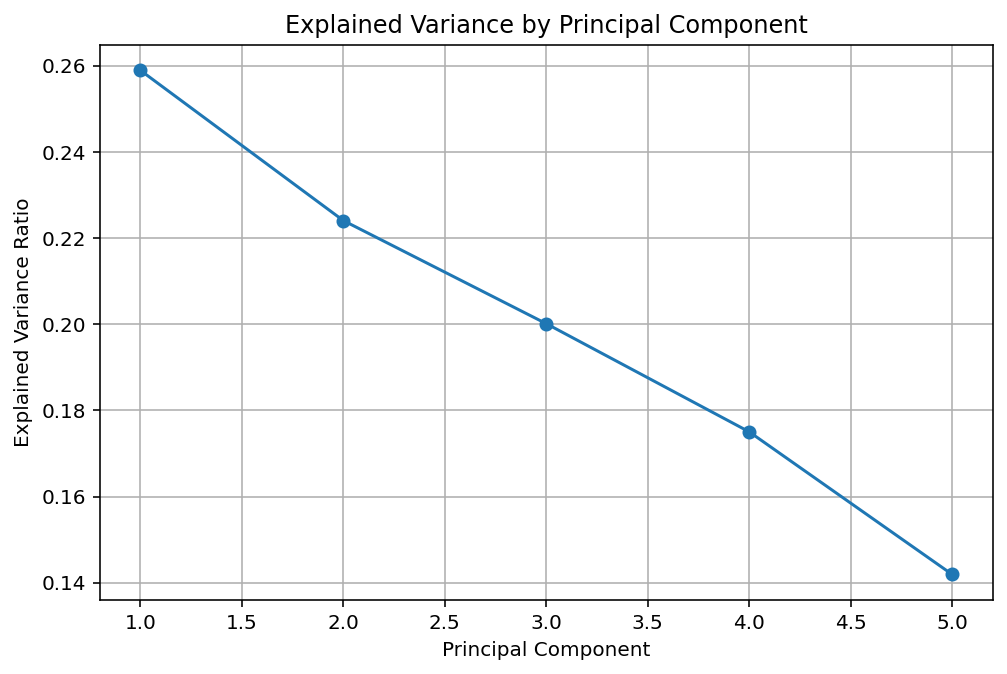

In [11]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(maturities) + 1), explained_variance, marker="o", linestyle="-")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Component")
plt.grid()
plt.show()
